**Ejercicio Análisis Módulo 6**

Carga de Librerías


In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Carga de Base de datos


In [ ]:
datosCompletos = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')

Exploración de datos

In [ ]:
datosCompletos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
datosCompletos.shape

(1338, 7)

Validar si existen datos nulos

Text(0.5, 1.0, 'Valores faltantes en la base de datos')

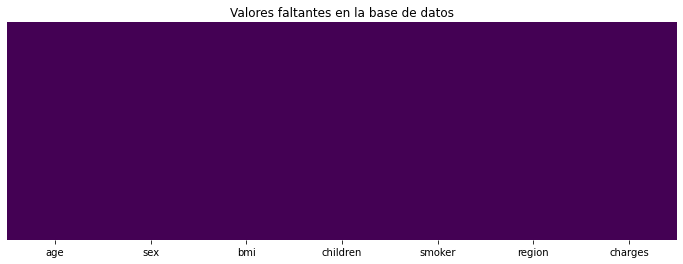

In [ ]:
plt.figure(figsize = (12,4))
sns.heatmap(datosCompletos.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

**Transformación de variables categoricas**

Las variables smoker son variables catecoricas que hay que transformar para poder determinar su correlación

In [ ]:
#Analizando los posibles valores de las variables categoricas
fumadores = pd.unique(datosCompletos['smoker'])
fumadores

array([1, 0])

In [ ]:
#sustituimos los valores que son binarios
datosCompletos['smoker'] = datosCompletos['smoker'].replace(['yes','no'],[1,0])
datosCompletos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
#Selecccionado solo las columnas que nos interesan
datos = datosCompletos.loc[:,['age','bmi','smoker','charges']]

Correlación tomando en cuenta solo smoker como variable categorica

Se puede ver que la corrrelación entre las variables sex y charges es muy pequeña por lo cual podemos omitirla del modelo, al igual que la correlación entre children y charges, lo mismo sucede con region y charges

Las variables que tienen una fuerte correlación con charges son: age, bmi, smoker

In [ ]:
datos.corr()

,age,bmi,smoker,charges
age,1.000000,0.109272,-0.025019,0.299008
bmi,0.109272,1.000000,0.003750,0.198341
smoker,-0.025019,0.003750,1.000000,0.787251
charges,0.299008,0.198341,0.787251,1.000000


En el mapa de calor se puede ver que la correlación más que tiene charges es smoker

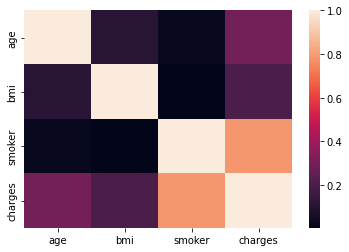

In [ ]:
import seaborn as sns
sns.heatmap(datos.corr().abs())
plt.show()

**Graficas de correlación**

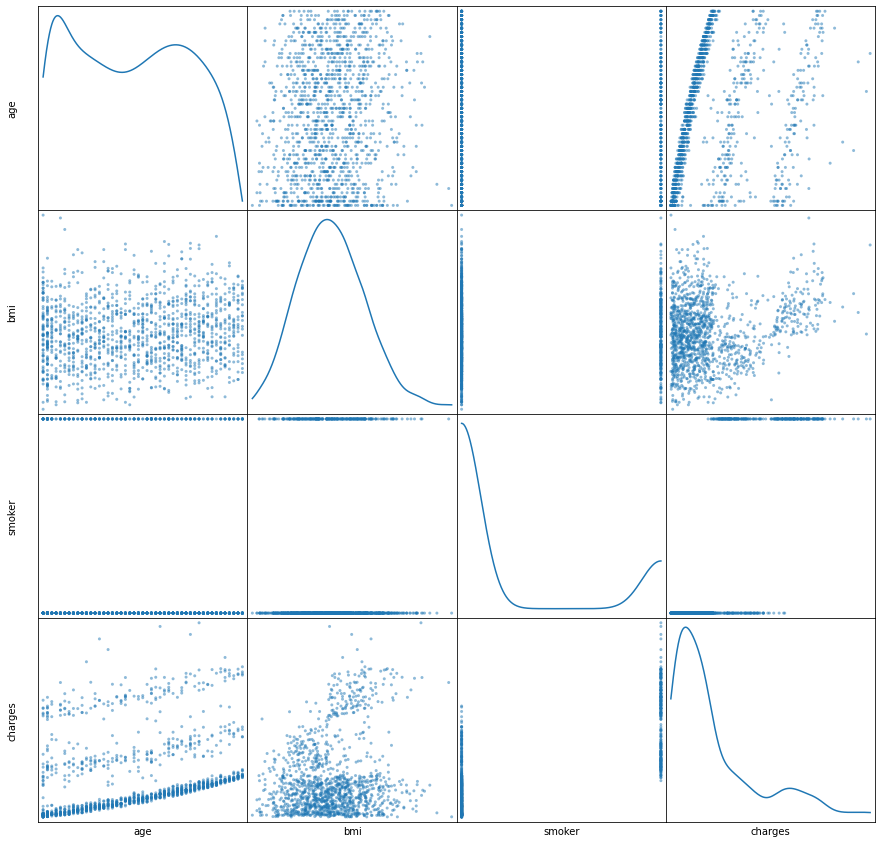

In [ ]:
sm = scatter_matrix(datos, figsize=(15,15), diagonal = 'kde')
#rotación de etiquetas
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(90) for s in sm.reshape(-1)]
#etiqueta de salida
[s.get_yaxis().set_label_coords(-0.1,0.5) for s in sm.reshape(-1)]
#quitar numeros
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

**Mostrando las distribuciones, destacando la variable smoker**


<function matplotlib.pyplot.show(*args, **kw)>

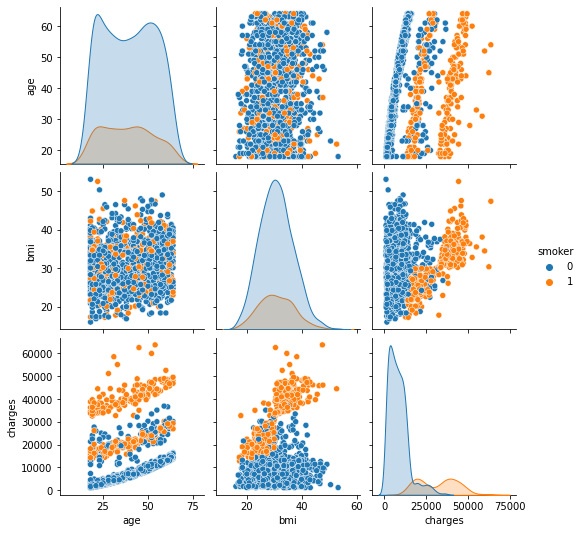

In [ ]:
sns.pairplot(datos, hue = 'smoker')
plt.show


**Mostrando las distribuciones, destacando la variable age**


<function matplotlib.pyplot.show(*args, **kw)>

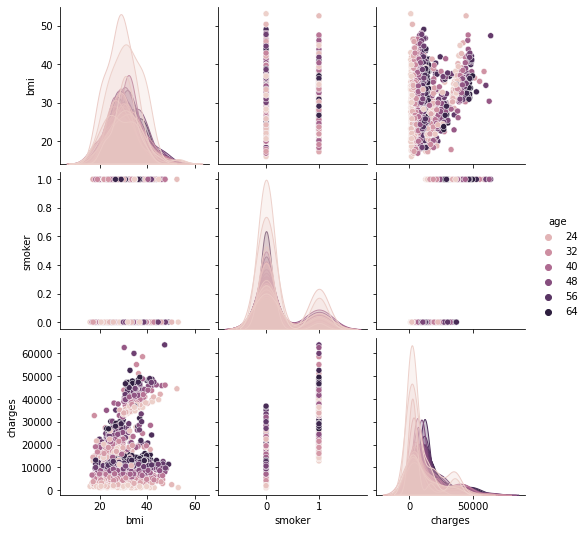

In [ ]:
sns.pairplot( datos, hue = 'age' )
plt.show

**Mostrando las distribuciones, destacando la variable bmi**

<function matplotlib.pyplot.show(*args, **kw)>

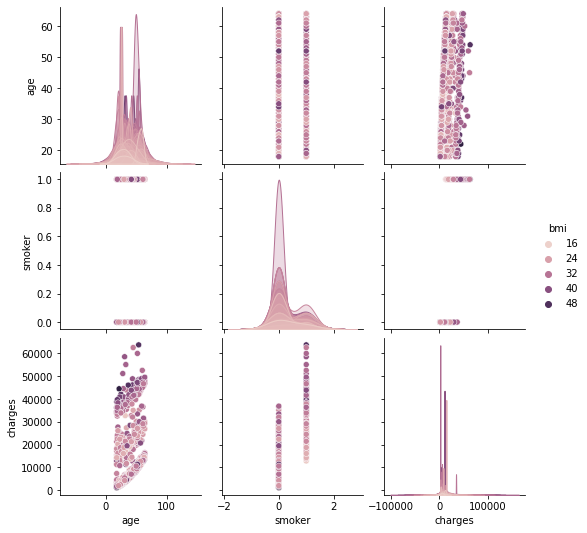

In [ ]:
sns.pairplot(datos, hue = 'bmi' )
plt.show

Por la gráfica se ve que los cargos aumentan si eres fumador e incrementa la edad

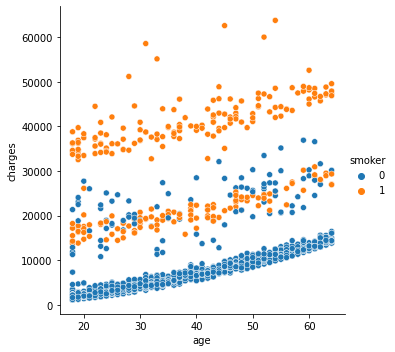

In [ ]:
sns.relplot(data=datos, x= 'age', y = 'charges', hue = 'smoker')

Se puede ver que el ser fumador es un factor más determinante para aumentar los cargos que la masa muscular

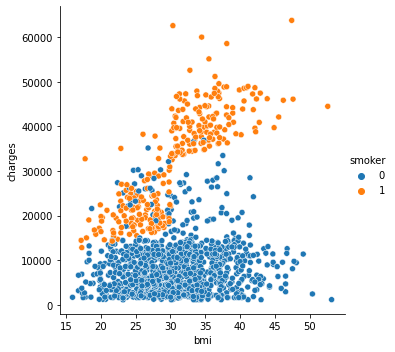

In [ ]:
sns.relplot(data=datos, x= 'bmi', y = 'charges', hue = 'smoker')

**Módelo de regresión lineal para Charges**

In [ ]:
def R2Ad(r2,n,k):
  Ad = 1-((1-r2)*((n-1)/(n-k-1)))
  return Ad

**Dividar bd en entrenamiento y prueba**

In [ ]:
#Dividar bd en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train, test = train_test_split(datos, test_size=0.2)

In [ ]:
train_x = train.loc[:, train.columns != 'charges']
test_x = test.loc[:, test.columns != 'charges']

train_y = train['charges']
test_y = test['charges']

In [ ]:
train.head()

,age,bmi,smoker,charges
236,18,26.73,0,1615.7667
421,61,35.86,1,46599.1084
1279,25,26.79,0,4189.1131
302,56,37.51,0,12265.5069
298,31,34.39,1,38746.3551


In [ ]:
train_x.head()

,age,bmi,smoker
236,18,26.73,0
421,61,35.86,1
1279,25,26.79,0
302,56,37.51,0
298,31,34.39,1


In [ ]:
train_y.head()

236      1615.7667
421     46599.1084
1279     4189.1131
302     12265.5069
298     38746.3551
Name: charges, dtype: float64

In [ ]:
#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
x_train_scaled = pd.DataFrame(scaler.transform(train_x), columns = train_x.columns)
x_train_scaled.head()
x_test_scaled = pd.DataFrame(scaler.transform(test_x), columns = test_x.columns)

In [ ]:
x_train_scaled.head()

,age,bmi,smoker
0,-1.514465,-0.641797,-0.502919
1,1.558275,0.835888,1.988392
2,-1.014251,-0.632086,-0.502919
3,1.200980,1.102939,-0.502919
4,-0.585497,0.597969,1.988392


Generando el modelo

In [ ]:
model = linear_model.LinearRegression()

Se ajusta el modelo multivariable.

In [ ]:
model.fit(x_train_scaled, train_y)

LinearRegression()

Recuperando coeficientes(w) de cada parámetro del modelo

In [ ]:
print(model.coef_)

[3474.27002168 2005.71618466 9722.72996888]


In [ ]:
#Ya que se entreno se predice con nuevos valores a que debe llegar el moedlo, y se utilizan los valores de prueba.
#test_pred es una lista de valores pronosticados en base a unos datos no utilizados previamente.

In [ ]:
test_pred = model.predict(x_test_scaled)

In [ ]:
#Diferencia cuadratica media entre el valor calculado y el valor real, entre más cerca a cero es más efectivo el modelo

In [ ]:
mean_squared_error(test_y, test_pred)

37592214.76089866

In [ ]:
#Se calcula la r cuadrada, mientras más se acerque a uno mejor.

In [ ]:
r2 = r2_score(test_y, test_pred)
print (r2)

0.7353843727033313


In [ ]:
n, k = np.shape(x_test_scaled)
#n, son las filas observadas
#k las variables predictoraas o numero de columnas para determinar Charge, es decir la longitud de número de variables

In [ ]:
 #R ajustada
 R2Ad(r2,n,k)

0.7323773769385964

**Regresión Ridge**

In [ ]:
from sklearn.linear_model import  Ridge, Lasso

In [55]:
Rd = Ridge()
model = Rd.fit(x_train_scaled, train_y)
y_predict = model.predict(x_test_scaled)
print('r2', r2_score(test_y, y_predict))
r2 = r2_score(test_y, y_predict)
n, k = np.shape(x_test_scaled)
print('r2_ad', R2Ad(r2,n,k) )


r2 0.7354517554585396
r2_ad 0.732445525406932


**Lasso**

In [ ]:
Ls = Lasso()
model = Ls.fit(x_train_scaled, train_y)
y_predict = model.predict(x_test_scaled)
print(r2_score(test_y, y_predict))
r2 = r2_score(test_y, y_predict)
n, k = np.shape(x_test_scaled)
print('r2_ad', R2Ad(r2,n,k) )

0.7353852350712683
r2_ad 0.732378249106169


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    model = knn.fit(x_train_scaled, train_y)
    y_predict = model.predict(x_test_scaled)
    print('n_neighbors', n_neighbors)
    print('weights',weights)
    print(r2_score(test_y, y_predict))

n_neighbors 5
weights uniform
0.7968643055720029
n_neighbors 5
weights distance
0.7814252489772271


In [57]:
n_neighbors = 5
for k in np.arange(1,7):
    knn = KNeighborsRegressor(n_neighbors = k, weights="uniform")
    y_predict = knn.fit(x_train_scaled, train_y).predict(x_test_scaled)
    n, ki = np.shape(x_test_scaled)    
    print('n_neighbors', k)
    r2 = r2_score(test_y, y_predict)
    print('r2', r2)
    print('r2_ad', R2Ad(r2,n,ki) )    

n_neighbors 1
r2 0.6512555389909573
r2_ad 0.6472925337522182
n_neighbors 2
r2 0.7453247469695168
r2_ad 0.7424307100032612
n_neighbors 3
r2 0.7686371475871511
r2_ad 0.7660080242642777
n_neighbors 4
r2 0.7899908853098753
r2_ad 0.7876044180974875
n_neighbors 5
r2 0.7968643055720029
r2_ad 0.7945559454080484
n_neighbors 6
r2 0.802369132328465
r2_ad 0.8001233270140157


In [ ]:
Model = []
RMSE = []
R_sq = []
cv = KFold(5)
MAPE = []

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, train_y)

In [ ]:
R_sq_ad = []
for Rs in R_sq:
  R_sq_ad.append(R2Ad(Rs,n,k))

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq,
                           'R2_ad':R_sq_ad})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared,R2_ad
0,Linear Regression,6103.518079,0.746702,0.737866
1,Ridge Regression,6103.492141,0.746706,0.737870
2,Lasso Regression,6103.522310,0.746702,0.737866
3,K Neighbors Regressor,4902.147460,0.836194,0.830480
4,Decision Tree Regressor,6805.166315,0.683988,0.672965
5,Random Forest Regressor,5267.990246,0.812401,0.805856
6,Gradient Boosting Regressor,4714.156390,0.847997,0.842695
7,Adaboost Regressor,5232.771980,0.817706,0.811347
